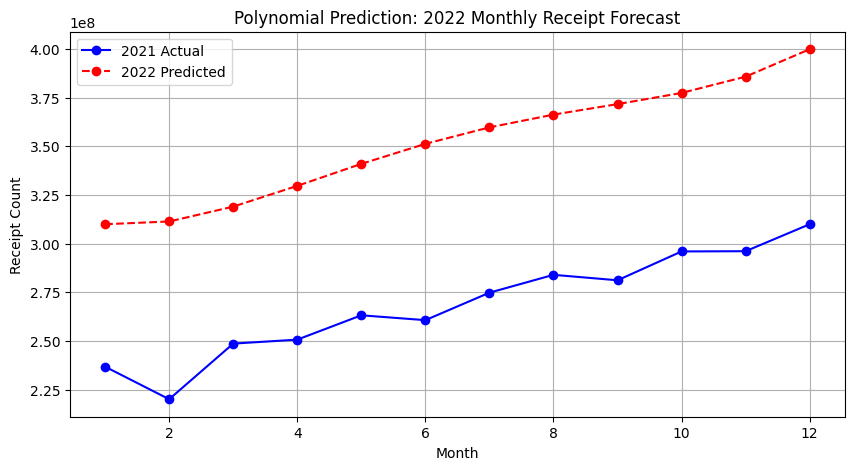

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv('/data_daily.csv')
df['# Date'] = pd.to_datetime(df['# Date'])
df['Month'] = df['# Date'].dt.month

# Aggregate to monthly
monthly_data = df.groupby('Month')['Receipt_Count'].sum().reset_index()
X = monthly_data['Month'].values.reshape(-1, 1)
y = monthly_data['Receipt_Count'].values

# Polynomial regression
degree = 4
X_poly = np.hstack([X**i for i in range(degree + 1)])
theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
X_2022 = np.arange(1, 13).reshape(-1, 1)
X_2022_poly = np.hstack([X_2022**i for i in range(degree + 1)])
y_pred_raw = X_2022_poly @ theta

# Rescale predictions to start where 2021 ended and match 2021 range
start_2022 = y[-1]
range_2021 = y.max() - y.min()
range_pred = y_pred_raw.max() - y_pred_raw.min()
y_pred_scaled = ((y_pred_raw - y_pred_raw[0]) / range_pred) * range_2021 + start_2022

# Plot
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'bo-', label='2021 Actual')
plt.plot(X_2022, y_pred_scaled, 'ro--', label='2022 Predicted')
plt.title("Polynomial Prediction: 2022 Monthly Receipt Forecast")
plt.xlabel("Month")
plt.ylabel("Receipt Count")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle

# Save model coefficients (theta)
with open('model_theta.pkl', 'wb') as f:
    pickle.dump(theta, f)